# MACHINE LEARNING CRASH COURSE
## 1: What is Machine Learning?
Imagine you were teaching a friend a new game.

How would they learn?

Could a computer learn in a similar way?

That's what machine learning is all about!

Ever wondered how Netflix recommends movies you might like?

They use machine learning models that analyze your past viewing habits and compare them to other users to predict what you'll enjoy next.

Key concepts:
Learning from data: Machines learn by analyzing large amounts of data, just like you learn by seeing examples and practicing.

Algorithms: These are like recipes that tell the machine how to learn from the data. Different algorithms are good for different tasks.

Patterns: Machine learning helps uncover hidden patterns in data, like Netflix finding patterns in your movie choices.

Predictions: Once a machine has learned, it can use its knowledge to make predictions about new data, like recommending your next movie.

Activity: Let's play a guessing game! I'll show you a sequence of numbers (e.g., 4, 5, 9, 14, 23, ...). Can you guess what the next number might be based on the pattern you see? This is a simple example of how we can learn from data and make predictions.

Other applications: predicting a student grade, self-driving cars, spam detection, weather condition, medical diagnosis, etc.

2: Data, the Fuel of Machine Learning
Where does all this data come from, and what does it look like?

It's like the ingredients for a recipe!

Imagine trying to predict tomorrow's weather. Meteorologists use vast amounts of data, like temperature, humidity, and wind speed, to train their models.

Key concepts:
Data types: Data can be numbers (e.g., temperatures), text (e.g., movie reviews), or even images (e.g., pictures of animals).

Understanding data: Before using data, we need to clean it up and make sure it's in a format the machine can understand. Imagine using dirty, expired ingredients in your recipe!

Preparing data: This might involve organizing data, filling in missing information, and removing errors. It's like prepping your ingredients before cooking.

**Activity: Let's explore a real-world dataset together! We can analyze how different credit parameters affect credit score and be able to make a decision if to approve a customer's loan or not.
    

#Suppose you want to predict what activity your friend would prefer for the weekend. What information would you gather, and how would you ensure it's useful in planning the weekend?

1. Data Collection:
Gather data about your friend's past weekend activities.

Note preferences mentioned by your friend during conversations about weekend plans.

Consider factors such as weather forecasts, upcoming events, and your friend's interests and hobbies.

2. Useful Information:
Prioritize recent data to reflect current interests and preferences.

Take into account any special occasions or events happening in your friend's life that might influence their weekend plans.

Look for patterns in past weekend activities, such as outdoor adventures, movie nights, or social gatherings.

Consider your friend's mood and energy levels when selecting weekend activities.

3. Different Types of Machine Learning
Just like we have different tools for different tasks, there are different types of machine learning for different problems. But before we dive into that, let's take a step back and revisit and solidify our understanding of what machine learning actually is.

Machine learning, at its core, involves teaching machines to learn from data without being explicitly programmed.

Think about braiding hair. When you first learn to braid, it might be challenging to create neat and intricate patterns. You might need guidance from someone more experienced, and you learn by observing their techniques and practicing on different hair types. As you gain more experience, you develop your own style and become more skilled at braiding. Machine learning follows a similar process. Initially, computers may struggle to recognize patterns in data or make accurate predictions. But with exposure to examples and feedback, they learn to identify patterns and make better predictions, just like mastering the art of braiding hair.

Types of Machine Learning:

Now, back to the different types! Just like you wouldn't use the same tool to hammer a nail and sew a button, different machine learning algorithms are suited for different tasks. Here are two main categories:

1. Supervised Learning: This is like having a teacher guide your learning. You provide the machine with labeled data (e.g., images of cats and dogs labeled as "cat" or "dog") and the algorithm learns to make predictions on new, unseen data (e.g., classifying a new image as a cat or dog).

Regression: As mentioned earlier, this predicts continuous values. Imagine learning to predict the temperature tomorrow based on today's data. It's like aiming for a specific temperature when planning an outing.

**Classification: **This predicts categories. Like sorting your laundry, these algorithms learn to categorize data points into predefined groups. For example, classifying emails as spam or not spam.

2. Unsupervised Learning: This is like exploring and learning on your own. You give the machine unlabeled data, and it finds patterns and hidden structures within it. Imagine exploring a new city without a map and discovering interesting neighborhoods.

Clustering: This groups similar data points together, like clustering customers based on their purchasing habits. It's like organizing your friends based on their hobbies.
Dimensionality Reduction: This simplifies complex data by finding the most important information, like summarizing a long book into key points. It's like condensing a large map into a smaller, easier-to-navigate version.
4. Building an end-to-end machine learning model
case study: Predicting the future sale price of a product
Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df = df[['TV','Radio','Newspaper','Sales']]

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

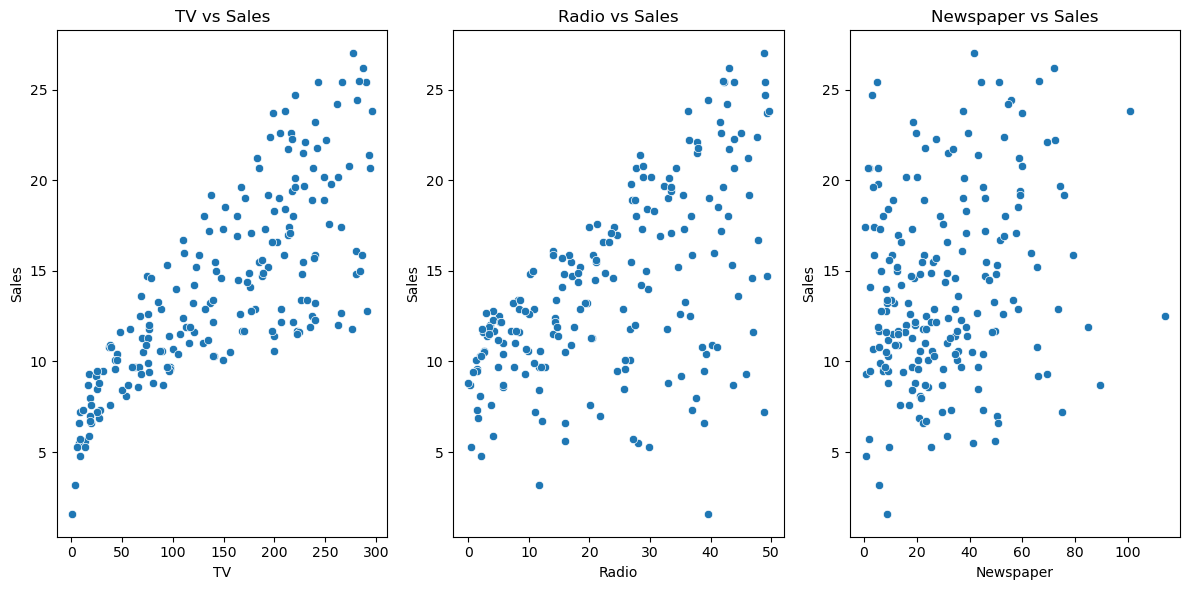

In [9]:
# Create scatter plots for each feature against the target variable (Sales)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

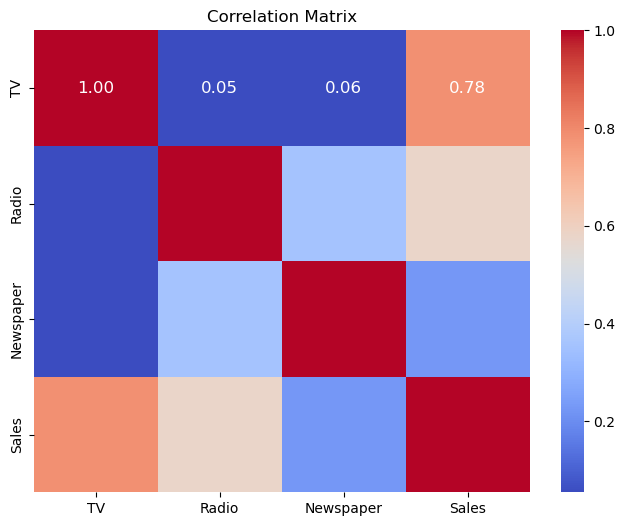

In [10]:
# Create a correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()

In [11]:
print(corr_matrix["Sales"].sort_values(ascending=False))


Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


### Split Dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = np.array(df.iloc[:, :-1])
y = np.array(df['Sales'])

In [14]:
# Splitting the data into training and testing sets, 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the model

In [15]:
#Import the linear Regression Model
from sklearn.linear_model import LinearRegression

In [16]:
#Initialize the Linear Regression Model
Lin_Regres = LinearRegression()

In [17]:
#Fit the Linear Regression Model to the split dataset
Lin_Regres.fit(X_train, y_train)

LinearRegression()

In [18]:
#To import another model called Random Forest Regressor, this will enable us to choose the better model to use for our sales prediction
from sklearn.ensemble import RandomForestRegressor

In [19]:
#To initialize another model called Random Forest Regressor
rf_regressor = RandomForestRegressor()

In [20]:
#Fit the Random Forest Regressor Model to the split dataset
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
#To see the accuracy rate of Linear regression model with the test dataset

print(Lin_Regres.score(X_test, y_test))

0.899438024100912


In [22]:
#To also see the accuracy rate of the Random Forest Regressor Model with the same test dataset
print(rf_regressor.score(X_test, y_test))

0.983211711277332


# We can see that the Random Forest Regressor Model performed better than Linear Regression model. So we would prefer to perform our real world predictions with the Random forest Regressor model


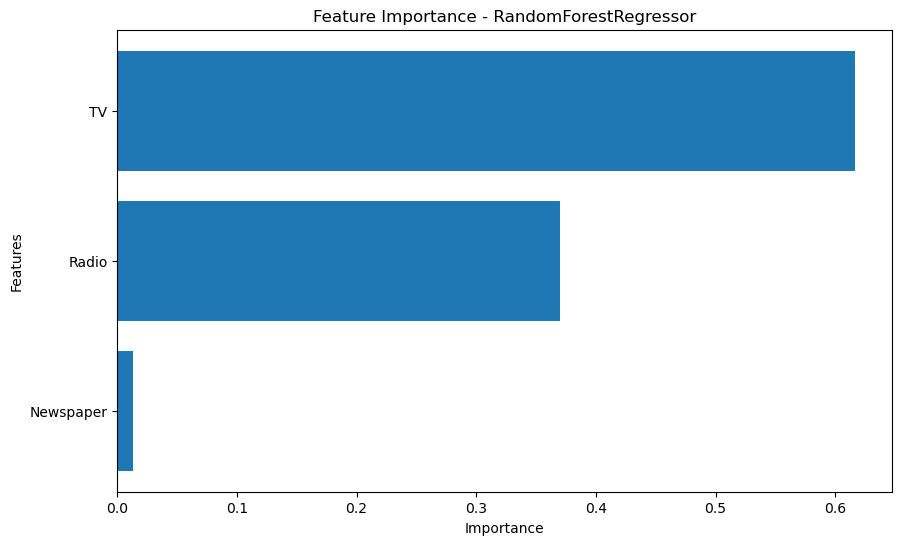

In [23]:
# Get feature importance from the trained RandomForestRegressor
feature_importances = rf_regressor.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(feature_importances)

# Rearrange feature names based on feature importance
feature_names = df.columns
sorted_feature_names = [feature_names[i] for i in indices]

# Plot feature importances horizontally
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - RandomForestRegressor")
plt.barh(range(len(feature_importances)), feature_importances[indices])
plt.yticks(range(len(feature_importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [24]:
print(X_test)

[[163.3  31.6  52.9]
 [195.4  47.7  52.9]
 [292.9  28.3  43.2]
 [ 11.7  36.9  45.2]
 [220.3  49.    3.2]
 [ 75.1  35.   52.7]
 [216.8  43.9  27.2]
 [ 50.   11.6  18.4]
 [222.4   3.4  13.1]
 [175.1  22.5  31.5]
 [ 31.5  24.6   2.2]
 [ 56.2   5.7  29.7]
 [234.5   3.4  84.8]
 [  5.4  29.9   9.4]
 [139.5   2.1  26.6]
 [170.2   7.8  35.2]
 [  7.3  28.1  41.4]
 [197.6  23.3  14.2]
 [ 75.3  20.3  32.5]
 [237.4  27.5  11. ]
 [229.5  32.3  74.2]
 [ 67.8  36.6 114. ]
 [ 38.   40.3  11.9]
 [250.9  36.5  72.3]
 [ 69.    9.3   0.9]
 [ 53.5   2.   21.4]
 [213.5  43.   33.8]
 [139.3  14.5  10.2]
 [ 87.2  11.8  25.9]
 [  8.4  27.2   2.1]
 [199.8   2.6  21.2]
 [ 69.2  20.5  18.3]
 [198.9  49.4  60. ]
 [ 16.9  43.7  89.4]
 [280.7  13.9  37. ]
 [238.2  34.3   5.3]
 [ 48.3  47.    8.5]
 [273.7  28.9  59.7]
 [117.2  14.7   5.4]
 [ 27.5   1.6  20.7]]


# It is time to check the model with regression model's Evaluation Metrics: mean_squared_error, mean_absolute_error, r2_score

In [25]:
#Import the evaluation metrics first
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [27]:
print(y_pred)

[17.927 21.811 20.821  6.685 23.338 13.552 22.443  9.572 11.859 15.371
  7.452  9.134 12.042  5.201 10.536 12.605  6.328 16.327 11.38  19.606
 20.018 13.171 10.418 22.011  9.967  8.948 22.224 12.771 10.139  5.181
 11.588 10.911 22.317  8.529 15.317 20.242 11.978 20.854 12.466  7.627]


In [28]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.53
Mean Absolute Error (MAE): 0.61
R-squared (R2): 0.98


In [29]:
from joblib import dump


# Save the trained model to a file
model_file = 'rf_regressor.joblib'
dump(rf_regressor, model_file)

['rf_regressor.joblib']

#